In [1]:
from datetime import timedelta, date
import h5py
from matplotlib import pyplot as plt
import PIL.Image
import os

State: DELAWARE
County: KENT
Date: 2017-07-15
FIPS: 10001

All Grids for KENT, DELAWARE on 2017-07-15


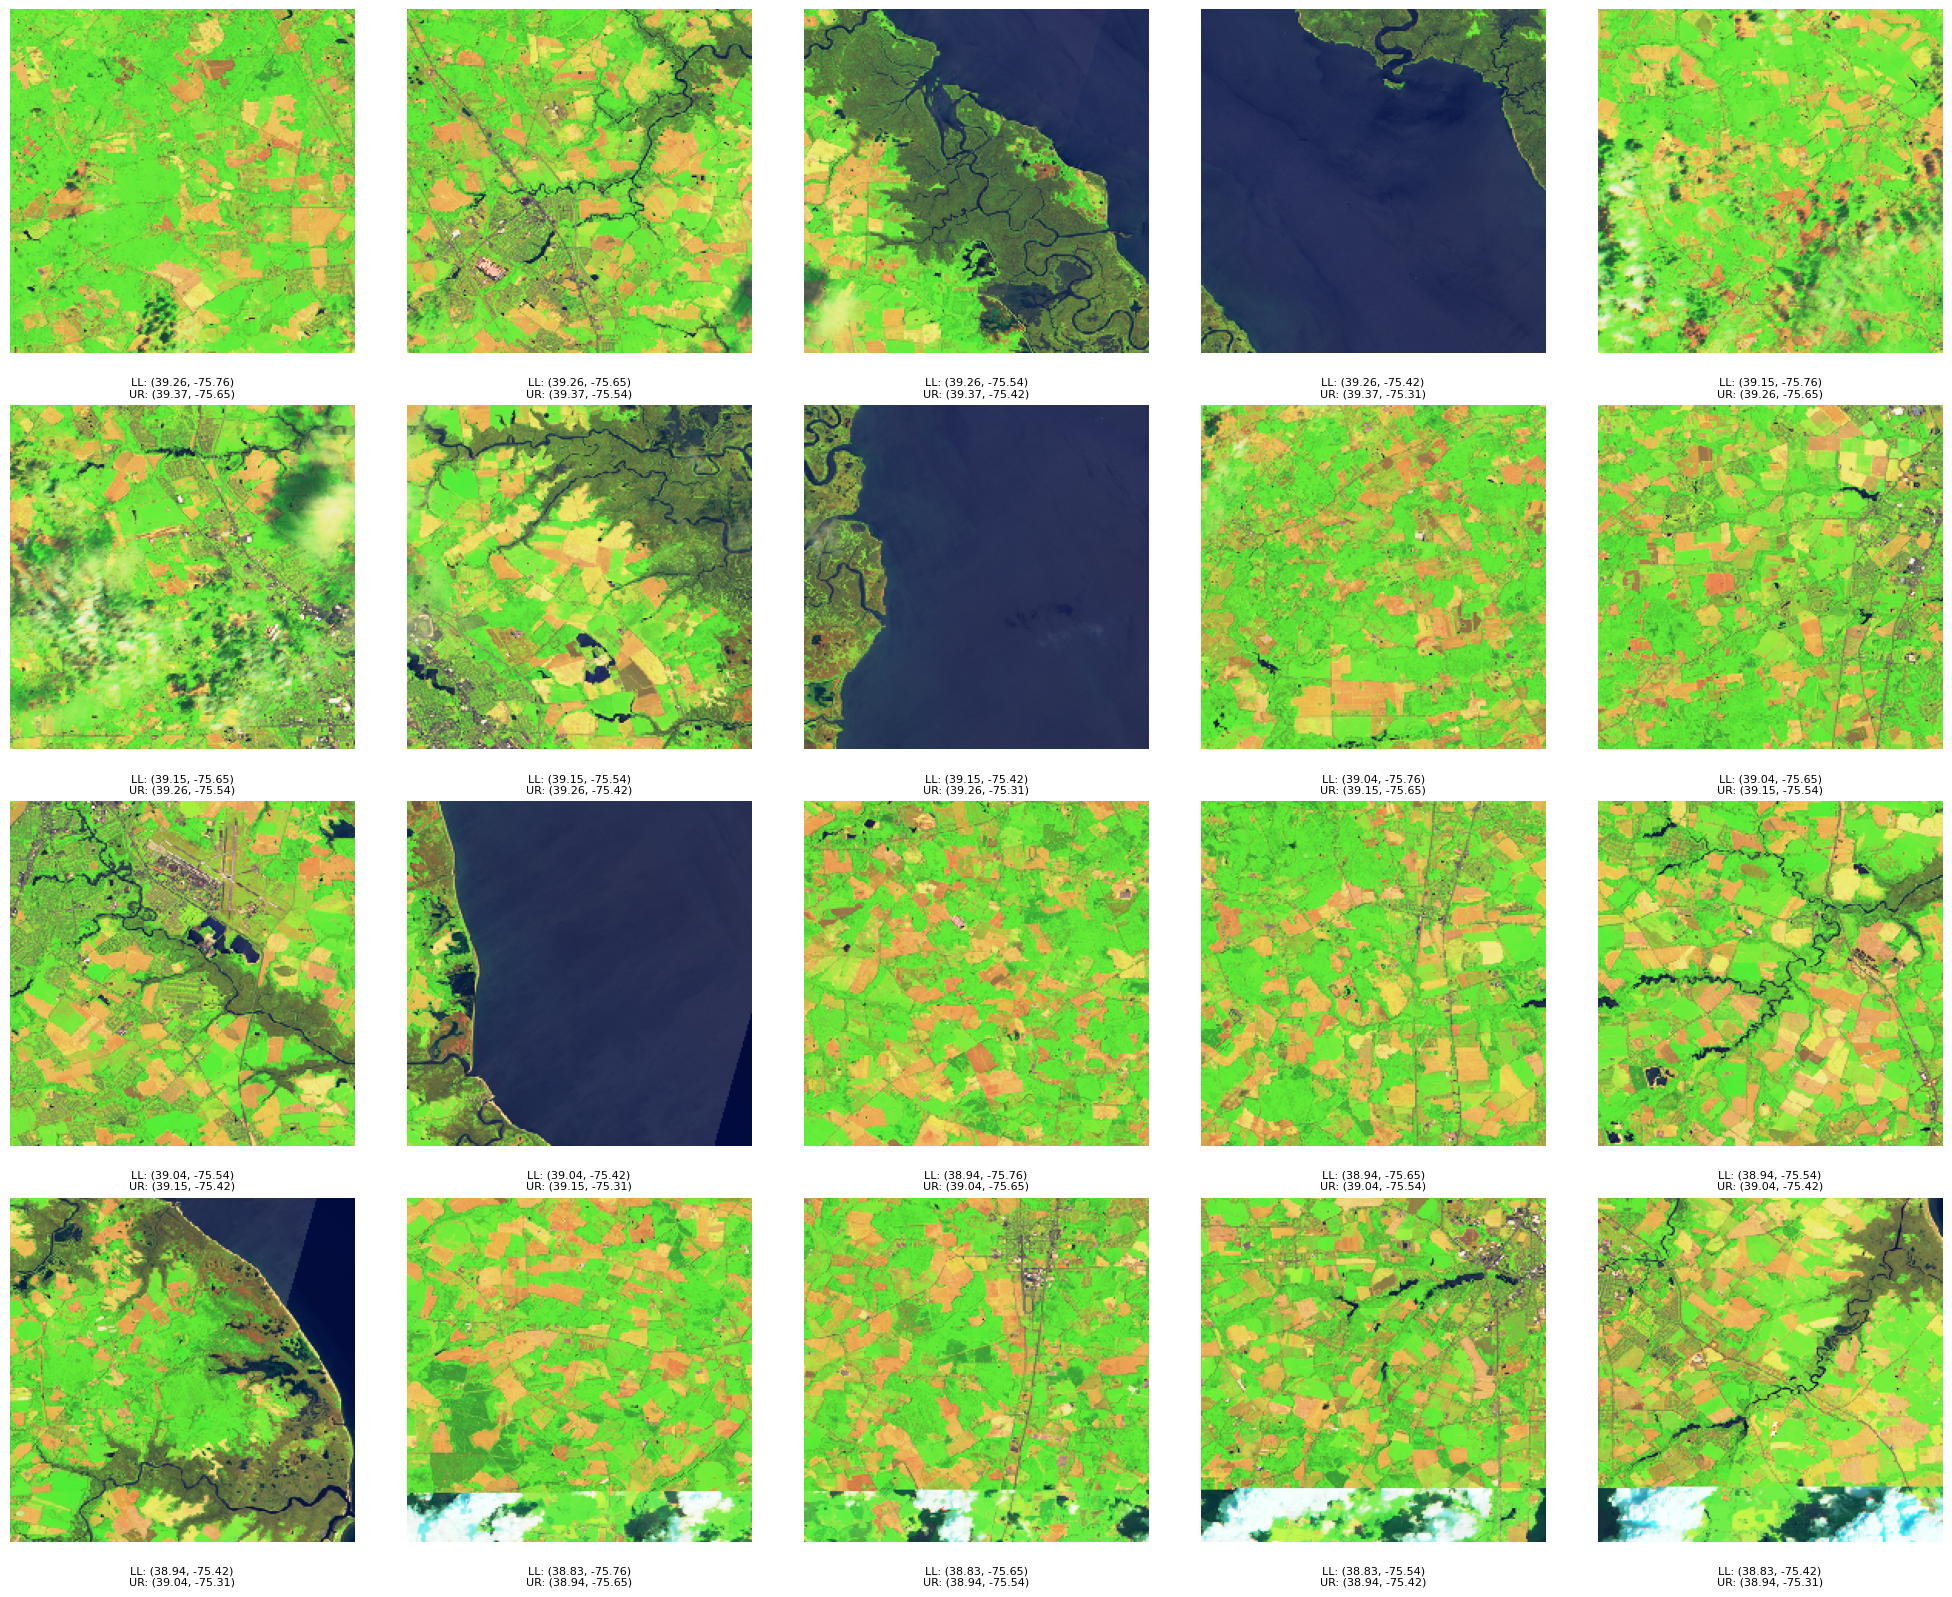

In [13]:

base_path = "/kaggle/input/cropnetv2"

def display_all_county_grids(base_path, h5_file_path, FIPS, date):
    """Function to display all grid images for a county based on a provided h5 file and parameters

    Parameters
    ----------
    base_path: (String) path to where the Sentinel data was downloaded
    h5_file_path: (String) path to the particular h5 file that has images to display
    FIPS: (String) the FIPS code of the county you want to represent
    date: (String) the date that you want images from (Example: "2021-04-01")

    Returns
    ----------
    None
    """
    full_path = os.path.join(base_path, h5_file_path)
    
    # read the h5 file
    with h5py.File(full_path, 'r') as h5_data:
        # get the particular county information
        FIPS_data = h5_data[FIPS]

        # get the particular date information
        date_data = FIPS_data[date]

        # print the state and county of the grid
        state = date_data["state"][0].decode()
        county = date_data["county"][0].decode()
        print(f"State: {state}")
        print(f"County: {county}")
        print(f"Date: {date}")
        print(f"FIPS: {FIPS}")
        print()

        # get the number of grids
        num_grids = date_data["data"].shape[0]

        # create a grid of subplots
        num_cols = 5  # You can adjust this for different layouts
        num_rows = (num_grids + num_cols - 1) // num_cols
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))
        print(f"All Grids for {county}, {state} on {date}")

        for grid_num in range(num_grids):
            row = grid_num // num_cols
            col = grid_num % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]

            # display the image of the chosen grid
            image_data = date_data["data"][grid_num]
            ax.imshow(image_data)
            #ax.set_title(f"Grid {grid_num}")
            ax.axis('off')

            # print the coordinates of the particular grid
            coordinates = date_data["coordinates"][grid_num]
            coord_text = f"LL: ({coordinates[0][0]:.2f}, {coordinates[0][1]:.2f})\nUR: ({coordinates[1][0]:.2f}, {coordinates[1][1]:.2f})"
            ax.text(0.5, -0.1, coord_text, ha='center', va='center', transform=ax.transAxes, fontsize=8)

        # Remove any unused subplots
        for i in range(num_grids, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

        plt.tight_layout()
        plt.show()

# Example usage
file_path = "/kaggle/input/cropnetv2/AG/DE/2017/Agriculture_10_DE_2017-07-01_2017-09-30.h5"
display_all_county_grids(base_path, file_path, "10001", "2017-07-15")